In [38]:
from sympy import symbols, Eq, solve

r1 = symbols('r1')
r2 = symbols('r2')
r3 = symbols('r3')
r4 = symbols('r4')

c1_vol = 3.3
c2_vol = 0.3
c3_vol = 1.32
c4_vol = 1.98
c5_vol = 2.64

c1 = Eq(r1, 10e4)
c2 = Eq(3.3/c2_vol, (1/(1/r2 + 1/r3 + 1/r4)) )
c3 = Eq(c3_vol, 1/(1/r3 + 1/r4) * ((3.3-c3_vol)/r1 + (5-c3_vol)/r2 ) )
c4 = Eq(c4_vol, 1/(1/r2 + 1/r4) * ((3.3-c4_vol)/r1 + (12-c4_vol)/r3 ))
c5 = Eq(c5_vol, r4 * ( (3.3-c5_vol)/r1 + (5-c5_vol)/r2 + (12-c5_vol)/r3 ))

c2_vol_fault_none = symbols('c2_vol_fault_none')
c2_fault_none = Eq(c2_vol_fault_none/3.3, (r4/(r1+r4)) )

c2_vol_fault_no5v = symbols('c2_vol_fault_no5v')
c2_fault_no5v = Eq(c2_vol_fault_no5v/3.3, (1/ (1/r4 + 1/r3) ) / ((1/ (1/r4 + 1/r3) ) + r1) )

c2_vol_fault_no12v = symbols('c2_vol_fault_no12v')
c2_fault_no12v = Eq(c2_vol_fault_no12v/3.3, (1/ (1/r4 + 1/r2) ) / ((1/ (1/r4 + 1/r2) ) + r1) )

syms = [
    r1,
    r2,
    r3,
    r4,
    c2_vol_fault_none,
    c2_vol_fault_no5v,
    c2_vol_fault_no12v
]

equations = [
    c2,
    c3,
    c4,
    c5,
    c2_fault_none,
    c2_fault_no5v,
    c2_fault_no12v
]

results = solve(equations, syms)[0]
print(results)

[(44.0000000000000, 66.6666666666667, 80.0000000000000, 15.7706093189964, 0.870712401055409, 0.760368663594470, 0.741573033707865)]


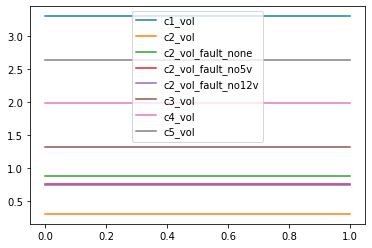

In [46]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1)

voltages = {
    "c1_vol": c1_vol,
    "c2_vol": c2_vol,
    "c2_vol_fault_none": results[4],
    "c2_vol_fault_no5v": results[5],
    "c2_vol_fault_no12v": results[6],
    "c3_vol": c3_vol,
    "c4_vol": c4_vol,
    "c5_vol": c5_vol,
}

for key, val in voltages.items():
    ax.plot([0,1], [val, val], label=key)
ax.legend()